# Eksploracja danych projekt

## Przygotowanie danych

In [1]:
!pip install wbgapi

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbgapi as wb
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', None)

In [2]:
# listy ze wskaźnikami

# wskaźniki skróty
all_indicators = ['NY.GDP.PCAP.PP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD',    'NV.AGR.TOTL.ZS', 'NE.IMP.GNFS.ZS', 'NE.EXP.GNFS.ZS', 'SP.DYN.LE00.IN', 'SH.IMM.IDPT',    'SH.DYN.NMRT', 'SH.HIV.1524.MA.ZS', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM',    'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SM.POP.REFG.OR',    'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS']
economic_indicators = ['NY.GDP.PCAP.PP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD',    'NV.AGR.TOTL.ZS', 'NE.IMP.GNFS.ZS', 'NE.EXP.GNFS.ZS']
health_indicators = ['SP.DYN.LE00.IN', 'SH.IMM.IDPT',    'SH.DYN.NMRT', 'SH.HIV.1524.MA.ZS']
sociodemographic_indicators = ['SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM',    'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SM.POP.REFG.OR',    'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS']

# wskaźniki pełne nazwy
sociodemographic_indicators_full_name = ['Death rate, crude (per 1,000 people)', '	Fertility rate, total (births per woman)', 'Net migration', 'Population ages 0-14 (% of total population)', 'Population ages 65 and above (% of total population)', 'Population growth (annual %)', 'Population, female (% of total population)', 'Population, total', 'Refugee population by country or territory of origin', 'Urban population (% of total population)']
health_indicators_full_name = ['Immunization, DPT (% of children ages 12-23 months)', 'Life expectancy at birth, total (years)', '	Mortality rate, neonatal (per 1,000 live births)', 'Prevalence of HIV, male (% ages 15-24)']
economic_indicators_full_name = ['Agriculture, forestry, and fishing, value added (% of GDP)', 'Exports of goods and services (% of GDP)', 'Foreign direct investment, net inflows (BoP, current US$)', 'GDP per capita, PPP (current international $)', 'Imports of goods and services (% of GDP)', '	Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']
    


In [3]:
# lista krajów
all_countries = ['AFE', 'AFW', 'ALB', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GEO', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KGZ', 'KHM', 'LAO', 'LIC', 'LKA', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MNG', 'MRT', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'VNM', 'WLD', 'ZAF', 'ZMB']

In [4]:
wb.series.info(economic_indicators)

id,value
NV.AGR.TOTL.ZS,"Agriculture, forestry, and fishing, value added (% of GDP)"
NE.EXP.GNFS.ZS,Exports of goods and services (% of GDP)
BX.KLT.DINV.CD.WD,"Foreign direct investment, net inflows (BoP, current US$)"
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NE.IMP.GNFS.ZS,Imports of goods and services (% of GDP)
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
,7 elements


In [5]:
def data_frame(indicators, countries):
    socio_dict = dict(zip(sociodemographic_indicators ,sociodemographic_indicators_full_name))
    health_dict = dict(zip(health_indicators,health_indicators_full_name))
    economic_dict = dict(zip(economic_indicators,economic_indicators_full_name))
    mappings = socio_dict | health_dict | economic_dict
    df = wb.data.DataFrame(indicators, economy=countries, time=range(1992,2021), labels=True)
    df = df.rename(columns=lambda x: x.replace('YR', ''))
    id_vars=[f'{x}' for x in range(1992,2021)]

    df_melted = df.reset_index(level=['economy','series'])
    df_melted['series_name'] = df_melted['series'].replace(mappings)
    return df_melted

In [6]:
df = wb.data.DataFrame(all_indicators, all_countries, time=range(1990,2021))
df

YR1990        YR1991        YR1992  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  8.867306e+07  1.241969e+09  6.523250e+08   
        FP.CPI.TOTL.ZG     1.245791e+01  1.767810e+01  1.616761e+01   
        NE.EXP.GNFS.ZS     2.061089e+01  1.875437e+01  2.183226e+01   
        NE.IMP.GNFS.ZS     1.966854e+01  1.948130e+01  2.119271e+01   
        NV.AGR.TOTL.ZS     1.751717e+01  1.898274e+01  1.248433e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.692339e+00  2.661017e+00  2.626364e+00   
        SP.POP.GROW        2.571365e+00  2.493438e+00  2.430372e+00   
        SP.POP.TOTL        7.686401e+06  7.880466e+06  8.074337e+06   
        SP.POP.TOTL.FE.ZS  5.168522e+01  5.173123e+01  5.177919e+01   
        SP.URB.TOTL.IN.ZS  3.940700e+01  3.898900e+01  3.851400e+01   

                                 YR1993        YR1994        YR1995  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  8.395097e+08  1.187865e+09  2.662959e+09   
        FP.CPI.TOTL.ZG     1.313566e+01  1.485281e+01  1.228859e+01   
        NE.EXP.GNFS.ZS     2.308516e+01  2.412068e+01  2.479106e+01   
        NE.IMP.GNFS.ZS     2.138473e+01  2.413653e+01  2.599087e+01   
        NV.AGR.TOTL.ZS     1.279103e+01  1.232410e+01  1.200164e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.588322e+00  2.546236e+00  2.500577e+00   
        SP.POP.GROW        2.405463e+00  2.428276e+00  2.446966e+00   
        SP.POP.TOTL        8.270917e+06  8.474216e+06  8.684135e+06   
        SP.POP.TOTL.FE.ZS  5.182728e+01  5.186751e+01  5.189972e+01   
        SP.URB.TOTL.IN.ZS  3.804200e+01  3.757200e+01  3.710400e+01   

                                 YR1996        YR1997        YR1998  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.087427e+09  5.757028e+09  4.121574e+09   
        FP.CPI.TOTL.ZG     9.706586e+00  1.024960e+01  7.495256e+00   
        NE.EXP.GNFS.ZS     2.594899e+01  2.513802e+01  2.522770e+01   
        NE.IMP.GNFS.ZS     2.660097e+01  2.629356e+01  2.720031e+01   
        NV.AGR.TOTL.ZS     1.251463e+01  1.314760e+01  1.326676e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL        8.902019e+06  9.133156e+06  9.372430e+06   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.254804e+09  4.315007e+09  1.220501e+10   
        FP.CPI.TOTL.ZG     7.819865e+00  8.601485e+00  5.840354e+00   
        NE.EXP.GNFS.ZS     2.515532e+01  2.598892e+01  2.714685e+01   
        NE.IMP.GNFS.ZS     2.566947e+01  2.586736e+01  2.702183e+01   
        NV.AGR.TOTL.ZS     1.231437e+01  1.258067e+01  1.253985e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL        9.621238e+06  9.891136e+06  1.019196e+07   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.464122e+09  8.555149e+09  7.979692e+09   
        FP.CPI.TOTL.ZG     8.763754e+00  7.449700e+00  5.023421e+00   
        NE.EXP.GNFS.ZS     2.837285e+01  2.611123e+01

In [7]:
# creating copy of a dataframe 
df_copy = df.copy()

Oto objaśnienia wybranych wskaźników: <br>
**Wskaźniki ekonomiczne:** <br>
1. 'NY.GDP.PCAP.PP.CD': Wskaźnik PKB na mieszkańca w parze siły nabywczej - mierzy wartość produkcji towarów i usług przypadającą na jednego mieszkańca, uwzględniając różnice w siłach nabywczych walut między krajami.
2. 'FP.CPI.TOTL.ZG': Wskaźnik inflacji - mierzy wzrost średniego poziomu cen w gospodarce i jest używany do monitorowania zmiany siły nabywczej waluty.
3. 'SL.UEM.TOTL.ZS': Wskaźnik bezrobocia - mierzy odsetek osób bezrobotnych w wieku 15 lat i starszych w stosunku do siły roboczej.
4. 'BX.KLT.DINV.CD.WD': Wskaźnik bezpośrednich inwestycji zagranicznych - mierzy wartość bezpośrednich inwestycji dokonywanych przez inwestorów zagranicznych w kraju.
5. 'NV.AGR.TOTL.ZS': Udział sektora rolnego w PKB - mierzy wartość produkcji rolniczej w stosunku do wartości całkowitej produkcji w kraju.
6. 'NE.IMP.GNFS.ZS': Wskaźnik importu towarów i usług - mierzy wartość importu w stosunku do wartości całkowitej produkcji w kraju.
7. 'NE.EXP.GNFS.ZS': Wskaźnik eksportu towarów i usług - mierzy wartość eksportu w stosunku do wartości całkowitej produkcji w kraju. <br>
**Wskaźniki zdrowotne:** <br>
8. 'SH.DYN.NMRT': Wskaźnik śmiertelności niemowląt - liczba zgonów noworodków na 1000 urodzeń żywych. A
12. 'SH.IMM.IDPT': Udział dzieci w wieku 12-23 miesięcy, które otrzymały szczepionkę przeciwko błonicy, tężcowi i krztuścowi - wskaźnik ten mierzy odsetek dzieci w wieku 12-23 miesięcy, które otrzymały trzy dawki szczepionki przeciwko błonicy, tężcow. A
13. 'SP.DYN.LE00.IN': Oczekiwana długość życia (ang. Life expectancy at birth, total (years)) - jest to średnia liczba lat, jakie spodziewa się żyć osoba urodzona w danym kraju w danym roku. A
14. 'SH.HIV.1524.MA.ZS': Udział mężczyzn w wieku 15-24 lat zakażonych HIV (ang. HIV prevalence, male (% ages 15-24)) - jest to odsetek mężczyzn w wieku 15-24 lat, którzy są zakażeni wirusem HIV. A <br>
**Wskaźniki socjodemograficzne** <br>
15. 'SP.DYN.CDRT.IN': Wskaźnik umieralności (ang. Mortality rate, crude (per 1,000 people)) - liczba zgonów na 1000 mieszkańców.
16. 'SP.DYN.TFRT.IN': Wskaźnik dzietności (ang. Fertility rate, total (births per woman)) - liczba dzieci, jakie przypada na kobietę w wieku rozrodczym.
17. 'SM.POP.NETM': Wskaźnik migracji netto (ang. Net migration) - to różnica między liczbą osób przybywających do danego kraju, a liczbą osób opuszczających ten kraj.
18. 'SP.POP.0014.TO.ZS': Udział populacji w wieku 0-14 lat (ang. Population, ages 0-14 (% of total population)) - to odsetek populacji w wieku od 0 do 14 lat w całkowitej populacji danego kraju.
19. 'SP.POP.65UP.TO.ZS': Udział populacji w wieku powyżej 65 lat (ang. Population ages 65 and above (% of total population)) - to odsetek populacji w wieku powyżej 65 lat w całkowitej populacji danego kraju.
20. 'SP.POP.TOTL.FE.ZS': Udział kobiet w populacji (ang. Population, female (% of total population)) - to odsetek kobiet w całkowitej populacji danego kraju.
21. 'SM.POP.REFG.OR': Liczba uchodźców (ang. Refugee
22. 'SP.POP.GROW': Tempo wzrostu populacji (ang. Population growth (annual %)) - to procentowa zmiana liczby ludności danego kraju w ciągu roku.
23. 'SP.POP.TOTL': Liczba ludności (ang. Population, total) - to liczba ludności w danym kraju.
24. 'SP.URB.TOTL.IN.ZS': Odsetek ludności mieszkającej w miastach (ang. Urban population (% of total population)) - to odsetek ludności mieszkającej w miastach w całkowitej populacji danego kraju.
25. 'SL.UEM.TOTL.ZS': Stopa bezrobocia (ang. Unemployment, total (% of total labor force)) - to odsetek osób bezrobotnych w całkowitej sile roboczej danego kraju.

### Brakujące wartości

In [8]:
# sprawdzanie brakujących wartości dla każego roku
df.isnull().sum()

YR1990    230
YR1991    120
YR1992     82
YR1993     61
YR1994     37
YR1995      7
YR1996      2
YR1997      2
YR1998      2
YR1999      0
YR2000      1
YR2001      2
YR2002      0
YR2003      1
YR2004      0
YR2005      1
YR2006      0
YR2007      0
YR2008      0
YR2009      0
YR2010      2
YR2011      2
YR2012      2
YR2013      2
YR2014      2
YR2015      0
YR2016      0
YR2017      3
YR2018      3
YR2019      3
YR2020      6
dtype: int64

Dla 1990 roku jest aż 230 brakujących wartości, a dla 1991 120 więc te lata zostaną usunięte ze zbioru danych.

In [9]:
# usuwanie 1990 i 1991 roku
df = df.drop(df.columns[0:2], axis=1)
df

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [10]:
# sprawdzanie ręczne krajów
df[df.isna().sum(axis=1) > 2]

YR1992        YR1993        YR1994  \
economy series                                                       
ALB     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
BTN     BX.KLT.DINV.CD.WD          NaN           NaN           NaN   
COD     FP.CPI.TOTL.ZG     4129.169857   1986.904762  2.377313e+04   
ESP     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
GEO     BX.KLT.DINV.CD.WD          NaN  10000.000000  8.000000e+06   
        FP.CPI.TOTL.ZG             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS       52.345845           NaN           NaN   
GRC     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
HRV     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
KGZ     FP.CPI.TOTL.ZG             NaN           NaN           NaN   
KHM     FP.CPI.TOTL.ZG             NaN           NaN           NaN   
LAO     NE.EXP.GNFS.ZS       17.025755     21.461619  2.498694e+01   
        NE.IMP.GNFS.ZS       27.105003     31.167193  3.982233e+01   
LKA     NE.EXP.GNFS.ZS       31.770374     33.801007  3.381288e+01   
        NE.IMP.GNFS.ZS       41.033382     43.346511  4.561791e+01   
LTU     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
LVA     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
MDA     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
MDG     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        SM.POP.REFG.OR             NaN           NaN           NaN   
MNG     SM.POP.REFG.OR             NaN           NaN           NaN   
MUS     SM.POP.REFG.OR             NaN           NaN           NaN   
PRT     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
SVK     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
SVN     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
SWZ     SM.POP.REFG.OR             NaN           NaN  1.100000e+01   
VNM     FP.CPI.TOTL.ZG             NaN           NaN           NaN   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
ALB     NV.AGR.TOTL.ZS              NaN  3.641086e+01  3.154344e+01   
BTN     BX.KLT.DINV.CD.WD  50000.000000  1.400000e+06 -7.000000e+05   
COD     FP.CPI.TOTL.ZG       541.908883  4.924419e+02  1.985167e+02   
ESP     NV.AGR.TOTL.ZS         3.884600  4.388976e+00  4.302210e+00   
GEO     BX.KLT.DINV.CD.WD           NaN           NaN  2.425000e+08   
        FP.CPI.TOTL.ZG       162.717152  3.935750e+01  7.087618e+00   
        NV.AGR.TOTL.ZS              NaN  3.315238e+01  2.750664e+01   
GRC     NV.AGR.TOTL.ZS         7.375806  6.584926e+00  6.241636e+00   
HRV     NE.EXP.GNFS.ZS        27.299633  3.031159e+01  3.104844e+01   
        NE.IMP.GNFS.ZS        35.488359  3.675223e+01  4.384550e+01   
        NV.AGR.TOTL.ZS         5.650062  5.592986e+00  5.242298e+00   
        NY.GDP.PCAP.PP.CD   

In [11]:
countries_to_delete = ['LKA', 'ALB','COD', 'GEO', 'KGZ', 'MNG', 'VNM', 'LAO']
df_filtered = df.drop(countries_to_delete, axis=0)
df_filtered

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [12]:
df_filtered.index.get_level_values('economy').nunique()

92

Usunięto kraje przy których było wiecej niż 3 wartości NAN pod rząd. W tabelii zostały 92 kraje. 

In [13]:
# sprawdzanie pozostąłych wartości NAN
df_filtered.isna().any(axis=1).sum()

76

W zbiorze danych nadal są brakujące wartości, ale występują one w pojedynczych latach więc można je zastąpić przy użyciu funkcji interpolate.

In [14]:
df_filled = df_filtered.interpolate()
df_filled

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [15]:
df_filled.isna().any(axis=1).sum()

0

Zmodyfikowany zestaw danych nie ma już żadnych wartości NAN

In [16]:
df_filled.index.get_level_values('economy').unique()

Index(['AFE', 'AFW', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL',
       'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU',
       'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC',
       'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN',
       'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LIC', 'LTU', 'LVA', 'MAR', 'MDA',
       'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MRT', 'MUS', 'MYS', 'NER', 'NGA',
       'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA',
       'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD',
       'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'WLD',
       'ZAF', 'ZMB'],
      dtype='object', name='economy')

### Kraje podzielone według kontynetów

- AFE: Afryka Wschodnia i Centralna (ang. Sub-Saharan Africa)
- AFW: Afryka Zachodnia (ang. Sub-Saharan Africa)
- AZE: Azerbejdżan
- BDI: Burundi
- BEN: Benin
- BFA: Burkina Faso
- BGD: Bangladesz
- BGR: Bułgaria
- BLR: Białoruś
- BOL: Boliwia
- BTN: Bhutan
- BWA: Botswana
- CHL: Chile
- CIV: Wybrzeże Kości Słoniowej (ang. Côte d'Ivoire)
- CMR: Kamerun
- COG: Kongo
- COL: Kolumbia
- CRI: Kostaryka
- DOM: Dominikana
- ECU: Ekwador
- EGY: Egipt
- ESP: Hiszpania
- FCS: Kraje o niskich dochodach i średniej wielkości gospodarkach (ang. Fragile and Conflict-Affected Situations)
- FJI: Fidżi
- FRA: Francja
- GAB: Gabon
- GHA: Ghana
- GMB: Gambia
- GNB: Gwinea Bissau
- GRC: Grecja
- GTM: Gwatemala
- HND: Honduras
- HPC: Kraje o niskich dochodach (ang. Heavily Indebted Poor Countries)
- HRV: Chorwacja
- HTI: Haiti
- IDA: Kraje o niskich dochodach (ang. International Development Association)
- IDB: Kraje o średnich dochodach (ang. International Bank for Reconstruction and Development)
- IDN: Indonezja
- IDX: Kraje o średnich dochodach (ang. IDA and IBRD total)
- IRN: Iran
- ITA: Włochy
- JAM: Jamajka
- KAZ: Kazachstan
- KEN: Kenia
- KHM: Kambodża
- LIC: Najmniej rozwinięte kraje świata (ang. Low income countries)
- LTU: Litwa
- LVA: Łotwa
- MAR: Maroko
- MDA: Mołdawia
- MDG: Madagaskar
- MEA: Kraje Bliskiego Wschodu i Afryki Północnej (ang. Middle East and North Africa)
- MEX: Meksyk
- MLI: Mali
- MNA: Kraje Bliskiego Wschodu i Afryki Północnej (ang. Middle East and North Africa)
- MRT: Mauretania
- MUS: Mauritius
- MYS: Malezja
- NER: Niger
- NGA: Nigeria
- NLD: Holandia
- NPL: Nepal
- PAK: Pakistan
- PER: Peru
- PHL: Filipiny
- PRE: Kraje o średnich dochodach (ang. Pre-demographic dividend)
- PRT: Portugalia
- PRY - Paragwaj (Paraguay)
- ROU - Rumunia (Romania)
- RWA - Rwanda
- SDN - Sudan
- SEN - Senegal
- SGP - Singapur (Singapore)
- SLV - Salwador (El Salvador)
- SSA - Afryka Subsaharyjska (Sub-Saharan Africa)
- SSF - Afryka Subsaharyjska (Sub-Saharan Africa)
- SVK - Słowacja (Slovakia)
- SVN - Słowenia (Slovenia)
- SWZ - Suazi (Eswatini)
- TCD - Czad (Chad)
- TGO - Togo
- THA - Tajlandia (Thailand)
- TMN - Mauretania (Mauritania)
- TSS - Terytorium Palestyńskie (State of Palestine)
- TUN - Tunezja (Tunisia)
- TZA - Tanzania
- UGA - Uganda
- UKR - Ukraina (Ukraine)
- URY - Urugwaj (Uruguay)
- WLD - Świat (World)
- ZAF - Republika Południowej Afryki (South Africa)
- ZMB - Zambia

W liście powyższej widzimy że nie wszystkie elementy z listy są krajami, niektóre elementy to grupy krajów, dlatego w następnym kroku utowrzymy nową liste, która zawiera tylko kraje

In [17]:
# w tej liście są kraje, ale też grupy krajów, np. kraje o niskim dochodzie
all_economies = ['AFE', 'AFW', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LIC', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MRT', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'WLD', 'ZAF', 'ZMB']

# lista samych krajów
countries = [
    'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA',
    'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP',
    'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV',
    'HTI', 'IDN', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LTU', 'LVA',
    'MAR', 'MDA', 'MDG', 'MEX', 'MLI', 'MRT', 'MUS', 'MYS', 'NER', 'NGA',
    'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN',
    'SEN', 'SGP', 'SLV', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TUN',
    'TZA', 'UGA', 'UKR', 'URY', 'ZAF', 'ZMB'
]

countries_full_names = ['Azerbaijan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Belarus', 'Bolivia', 'Bhutan',    'Botswana', 'Chile', 'Cote d\'Ivoire', 'Cameroon', 'Congo, Rep.', 'Colombia', 'Costa Rica',    'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Fiji', 'France', 'Gabon', 'Ghana', 'Gambia, The',    'Guinea-Bissau', 'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Haiti', 'Indonesia', 'Iran, Islamic Rep.',    'Italy', 'Jamaica', 'Kazakhstan', 'Kenya', 'Cambodia', 'Lithuania', 'Latvia', 'Morocco', 'Moldova',    'Madagascar', 'Mexico', 'Mali', 'Mauritania', 'Mauritius', 'Malaysia', 'Niger', 'Nigeria', 'Netherlands',    'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Portugal', 'Paraguay', 'Romania', 'Rwanda', 'Sudan', 'Senegal',    'Singapore', 'El Salvador', 'Slovakia', 'Slovenia', 'Eswatini', 'Chad', 'Togo', 'Thailand', 'Tunisia',    'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'South Africa', 'Zambia']


# te listy sa jeszzcze do sprawdzenia bo nie zgadza sie liczbowo z listą countries
Africa = ['AFE', 'AFW', 'BDI', 'BEN', 'BFA', 'CMR', 'COG', 'CIV', 'GAB', 'GHA', 'GMB', 'GNB', 'KEN', 'LIC', 'MDG', 'MLI', 'MRT', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SSA', 'SSF', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB']
Asia = ['AZE', 'BGD', 'BTN', 'IDN', 'IRN', 'KAZ', 'KHM', 'MDA', 'MYS', 'NPL', 'PAK']
Europe = ['BGR', 'BLR', 'ESP', 'HRV', 'ITA', 'LTU', 'LVA', 'PRT', 'ROU', 'SVK', 'SVN']
South_America = ['BOL', 'CHL', 'COL', 'ECU', 'PER', 'PRY']
Central_America = ['CRI', 'DOM', 'GTM', 'HND', 'HTI', 'JAM', 'MEX', 'NIC', 'PAN', 'SLV']
North_America = ['CAN', 'USA']
Australia_Oceania = ['FJI', 'NZL']

continent_dict = {
    'Africa': Africa,
    'Asia': Asia,
    'Europe': Europe,
    'South_America': South_America,
    'Central_America': Central_America,
    'North_America': North_America,
    'Australia_Oceania': Australia_Oceania
}

countries_continents = []
for country in countries:
    for continent, countries_list in continent_dict.items():
        if country in countries_list:
            countries_continents.append(continent)
            break

# len(Africa) + len(Asia) +len(Europe) + len(South_America) + len(Central_America)
len(countries)

76

In [18]:
len(countries_full_names)

76

In [19]:
# dataframe z 76 krajami
# nasz wyjściowy dataset ma 76 krajów w każdym po 21 wskaźników
df_filled = df_filled.loc[countries, :]
df_filled

YR1992        YR1993        YR1994  \
economy series                                                        
AZE     BX.KLT.DINV.CD.WD  1.060370e+01  1.000000e+04  2.200000e+07   
        FP.CPI.TOTL.ZG    -1.063010e+01  1.128000e+03  1.662216e+03   
        NE.EXP.GNFS.ZS     8.620361e+01  5.746242e+01  2.472111e+01   
        NE.IMP.GNFS.ZS     5.459638e+01  7.602803e+01  3.062821e+01   
        NV.AGR.TOTL.ZS     2.605963e+01  2.710955e+01  3.234566e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AZE     BX.KLT.DINV.CD.WD  3.300500e+08  6.272770e+08  1.114838e+09   
        FP.CPI.TOTL.ZG     4.117596e+02  1.979480e+01  3.674348e+00   
        NE.EXP.GNFS.ZS     3.248664e+01  2.492864e+01  2.903461e+01   
        NE.IMP.GNFS.ZS     5.340707e+01  5.592110e+01  5.304436e+01   
        NV.AGR.TOTL.ZS     2.534446e+01  2.496158e+01  2.012792e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AZE     BX.KLT.DINV.CD.WD  1.022967e+09  5.103170e+08  1.299370e+08   
        FP.CPI.TOTL.ZG    -7.726979e-01 -8.525170e+00  1.805003e+00   
        NE.EXP.GNFS.ZS     2.269953e+01  2.797012e+01  4.017083e+01   
        NE.IMP.GNFS.ZS     5.452828e+01  4.185584e+01  3.837774e+01   
        NV.AGR.TOTL.ZS     1.814800e+01  1.839951e+01  1.608486e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AZE     BX.KLT.DINV.CD.WD  8.195790e+08  2.024577e+09  4.007330e+09   
        FP.CPI.TOTL.ZG     1.547196e+00  2.771165e+00  2.233865e+00   
        NE.EXP.GNFS.ZS     4.149861e+01  4.276784e+01  4.200658e+01   
        NE.IMP.GNFS.ZS     3.731658e+01  5.005031e+01  6.554537e+01   
        NV.AGR.TOTL.ZS     1.483746e+01  1.395464e+01  1.242566e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AZE     BX.KLT.DINV.CD.WD  4.719107e+09  4.476396e+09  4.485966e+09   
        FP.CPI.TOTL.ZG     6.708930e+00  9.679507e+00  8.328925e+00   
        NE.EXP.GNFS.ZS     4.878901e+01  6.294111e+01

## Normalizacja danych

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_filled)
df_scaled = pd.DataFrame(data=scaled, columns=df_filled.columns, index= df_filled.index)

# nasz zeskalowany dataset z 76 krajami i 21 wskaźnikami
df_scaled

YR1992    YR1993    YR1994    YR1995    YR1996  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD -0.064970 -0.073089 -0.048573  0.320745  0.640404   
        FP.CPI.TOTL.ZG    -0.064970 -0.073102 -0.083617 -0.077338 -0.082843   
        NE.EXP.GNFS.ZS    -0.064970 -0.073104 -0.083620 -0.077338 -0.082843   
        NE.IMP.GNFS.ZS    -0.064970 -0.073104 -0.083620 -0.077338 -0.082843   
        NV.AGR.TOTL.ZS    -0.064970 -0.073104 -0.083620 -0.077338 -0.082843   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.65UP.TO.ZS -0.064970 -0.073104 -0.083620 -0.077339 -0.082843   
        SP.POP.GROW       -0.064970 -0.073104 -0.083620 -0.077339 -0.082843   
        SP.POP.TOTL       -0.053307 -0.060482 -0.070120 -0.066864 -0.072579   
        SP.POP.TOTL.FE.ZS -0.064970 -0.073104 -0.083620 -0.077338 -0.082843   
        SP.URB.TOTL.IN.ZS -0.064970 -0.073104 -0.083620 -0.077338 -0.082843   

                             YR1997    YR1998    YR1999    YR2000    YR2001  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  1.137385  0.690125  0.221663 -0.007095  0.305783   
        FP.CPI.TOTL.ZG    -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        NE.EXP.GNFS.ZS    -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        NE.IMP.GNFS.ZS    -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        NV.AGR.TOTL.ZS    -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.65UP.TO.ZS -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        SP.POP.GROW       -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        SP.POP.TOTL       -0.079048 -0.065034 -0.063247 -0.060037 -0.064813   
        SP.POP.TOTL.FE.ZS -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   
        SP.URB.TOTL.IN.ZS -0.089096 -0.072016 -0.068721 -0.064399 -0.069480   

                             YR2002    YR2003    YR2004    YR2005    YR2006  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  1.003710  2.343386  1.176988  0.707484  0.407554   
        FP.CPI.TOTL.ZG    -0.070161 -0.080369 -0.057649 -0.056144 -0.048759   
        NE.EXP.GNFS.ZS    -0.070160 -0.080369 -0.057649 -0.056144 -0.048759   
        NE.IMP.GNFS.ZS    -0.070160 -0.080369 -0.057649 -0.056144 -0.048759   
        NV.AGR.TOTL.ZS    -0.070160 -0.080369 -0.057649 -0.056144 -0.048759   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.65UP.TO.ZS -0.070161 -0.080369 -0.057649 -0.056144 -0.048759   
        SP.POP.GROW       -0.070161 -0.080369 -0.057649 -0.056144 -0.048759   
        SP.POP.TOTL       -0.064587 -0.073814 -0.054722 -0.054171 -0.047541   
        SP.POP.TOTL.FE.ZS -0.070160 -0.080369 -0.057649 -0.056144 -0.048759   
        SP.URB.TOTL.IN.ZS -0.070160 -0.080369 -0.057649 -0.056144 -0.048759   

                             YR2007    YR2008    YR2009    YR2010    YR2011  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  0.204567  0.638124  0.996154  0.835703  0.467838   
        FP.CPI.TOTL.ZG    -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
        NE.EXP.GNFS.ZS    -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
        NE.IMP.GNFS.ZS    -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
        NV.AGR.TOTL.ZS    -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.65UP.TO.ZS -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
        SP.POP.GROW       -0.041081 -0.065672 -0.075875 -0.077440 -0.051604   
        SP.POP.TOTL       -0.040418 -0.063403 -0.070952 -0.073684 -0.049952   
        SP.POP.TOTL.FE.ZS -0.041081 -0.065672 -0.075875 -0.077440 -0.051604 

## TSNE dla 2020 roku


In [21]:
df_2020 = df_scaled.iloc[:,[-1]]
df_2020 = df_2020.unstack(level='series')
df_2020.columns = df_2020.columns.droplevel(level=0)
df_2020

series,BX.KLT.DINV.CD.WD,FP.CPI.TOTL.ZG,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NV.AGR.TOTL.ZS,NY.GDP.PCAP.PP.CD,SH.DYN.NMRT,SH.HIV.1524.MA.ZS,SH.IMM.IDPT,SL.UEM.TOTL.ZS,SM.POP.NETM,SM.POP.REFG.OR,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO.ZS,SP.POP.65UP.TO.ZS,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.URB.TOTL.IN.ZS
economy,,,,,,,,,,,,,,,,,,,,,
AZE,0.081229,-0.003414,-0.003414,-0.003414,-0.003414,-0.003411,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003397,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.001729,-0.003414,-0.003414
BDI,-0.001999,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003415,-0.003352,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.001374,-0.003414,-0.003414
BEN,0.025630,-0.003414,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.001304,-0.003414,-0.003414
BFA,-0.019900,-0.003414,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003415,-0.003411,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,0.000178,-0.003414,-0.003414
BGD,0.251160,-0.003414,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003424,-0.003411,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,0.024529,-0.003414,-0.003414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGA,0.142418,-0.003414,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003407,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,0.003997,-0.003414,-0.003414
UKR,0.047324,-0.003414,-0.003414,-0.003414,-0.003414,-0.003412,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003408,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,0.003952,-0.003414,-0.003414
URY,0.082899,-0.003414,-0.003414,-0.003414,-0.003414,-0.003410,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.002841,-0.003414,-0.003414


**Wszystkie wskaźniki**

In [22]:
# pca dodałąm tylko tak roboczo, zeby sprawdzic czy działa
# pca działa, ale TSNE nie chce prawdopodobnie przez to że są zbyt małe róznice w wartościach
from sklearn.decomposition import PCA
pca = PCA()
X2020_pca = pca.fit_transform(df_2020.values)

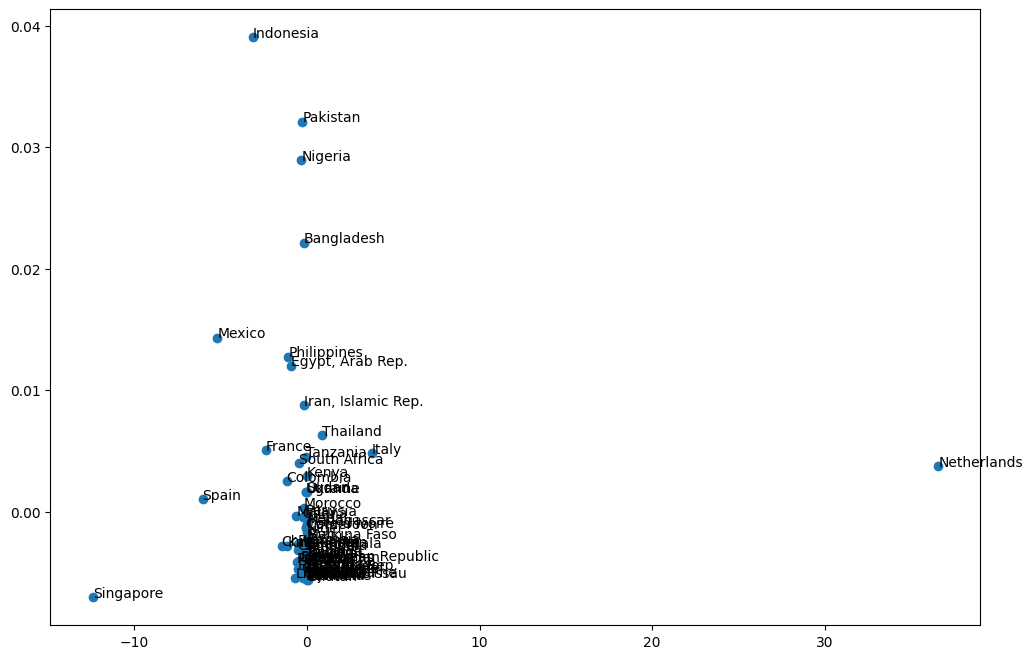

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X2020_pca[:,0], X2020_pca[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X2020_pca[i,0], X2020_pca[i,1]))

plt.show()

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=15, random_state=0)
X_2020_tsne = tsne.fit_transform(df_2020.values)
X_2020_tsne

# przeprowadzic skalowanie jeszcze raz, jest zbyt mała roznica w wartosciach

array([[-1.5112882 ,  2.9857183 ],
       [-5.773256  , 10.190982  ],
       [-3.7197454 ,  8.267167  ],
       [-6.3782635 , 10.71867   ],
       [ 1.338615  , -4.106876  ],
       [ 3.3542137 , -8.620338  ],
       [ 0.6515859 , -3.6936193 ],
       [-8.095003  ,  8.931258  ],
       [-5.3722305 , 10.878018  ],
       [-5.432149  ,  9.838486  ],
       [ 6.778199  , -9.051201  ],
       [-1.2046177 ,  0.3704047 ],
       [-0.8457228 ,  1.111326  ],
       [-8.214934  ,  8.462627  ],
       [ 6.3492327 , -9.321023  ],
       [ 1.6975852 , -5.926481  ],
       [ 2.3817277 , -6.5326223 ],
       [ 0.33277735, -2.1335418 ],
       [ 5.4858885 , -9.380946  ],
       [ 8.29794   , -6.770193  ],
       [-3.8152175 ,  6.927991  ],
       [ 7.615889  , -8.189435  ],
       [ 1.1637951 , -4.823008  ],
       [ 1.3746333 , -5.3582907 ],
       [-4.0783377 ,  7.7965684 ],
       [-4.946498  , 10.667832  ],
       [ 3.381588  , -7.9027214 ],
       [ 0.05949142, -1.6434186 ],
       [-3.5562952 ,

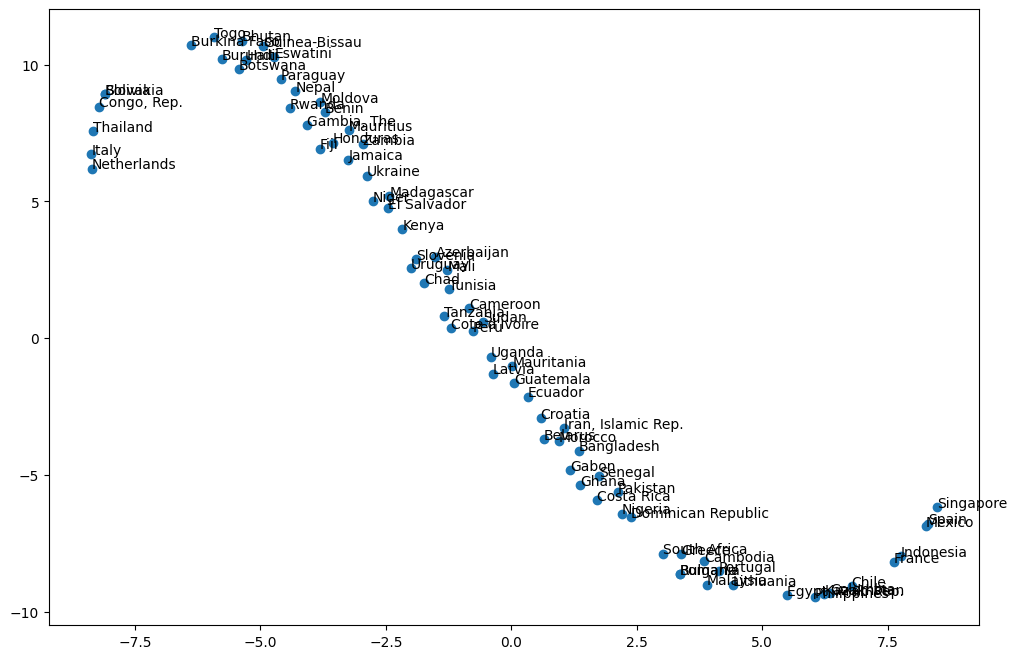

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_tsne[:,0], X_2020_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_2020_tsne[i,0], X_2020_tsne[i,1]))

plt.show()

**Wnioski:**

**Wskaźniki ekonomiczne**

In [85]:
wb.series.info(economic_indicators)

id,value
NV.AGR.TOTL.ZS,"Agriculture, forestry, and fishing, value added (% of GDP)"
NE.EXP.GNFS.ZS,Exports of goods and services (% of GDP)
BX.KLT.DINV.CD.WD,"Foreign direct investment, net inflows (BoP, current US$)"
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NE.IMP.GNFS.ZS,Imports of goods and services (% of GDP)
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
,7 elements


In [61]:
df_2020.loc[:,economic_indicators]

series,NY.GDP.PCAP.PP.CD,FP.CPI.TOTL.ZG,SL.UEM.TOTL.ZS,BX.KLT.DINV.CD.WD,NV.AGR.TOTL.ZS,NE.IMP.GNFS.ZS,NE.EXP.GNFS.ZS
economy,,,,,,,
AZE,-0.003411,-0.003414,-0.003414,0.081229,-0.003414,-0.003414,-0.003414
BDI,-0.003414,-0.003414,-0.003414,-0.001999,-0.003414,-0.003414,-0.003414
BEN,-0.003413,-0.003414,-0.003414,0.025630,-0.003414,-0.003414,-0.003414
BFA,-0.003413,-0.003414,-0.003414,-0.019900,-0.003414,-0.003414,-0.003414
BGD,-0.003413,-0.003414,-0.003414,0.251160,-0.003414,-0.003414,-0.003414
...,...,...,...,...,...,...,...
UGA,-0.003413,-0.003414,-0.003414,0.142418,-0.003414,-0.003414,-0.003414
UKR,-0.003412,-0.003414,-0.003414,0.047324,-0.003414,-0.003414,-0.003414
URY,-0.003410,-0.003414,-0.003414,0.082899,-0.003414,-0.003414,-0.003414


TSNE z perplexity = 15

In [79]:
tsne = TSNE(n_components=2, perplexity=15, random_state=0)
X_2020_economic_tsne = tsne.fit_transform(df_2020.loc[:,economic_indicators].values)
X_2020_economic_tsne

array([[ -4.7970066 ,  -2.924784  ],
       [-11.237773  ,  -9.54021   ],
       [ -8.86791   ,  -7.439128  ],
       [-12.4147835 ,  -8.994246  ],
       [  0.17677662,   3.4316936 ],
       [  3.6660845 ,   7.10138   ],
       [ -0.04088211,   2.801269  ],
       [-13.433134  ,  -6.55733   ],
       [-11.706823  ,  -8.792702  ],
       [-10.619606  ,  -9.235726  ],
       [  6.853911  ,   7.8605337 ],
       [ -3.0059073 ,  -0.9576786 ],
       [ -3.4954245 ,  -1.2777815 ],
       [-13.372701  ,  -6.0187306 ],
       [  6.4633217 ,   8.286438  ],
       [  1.0803524 ,   5.2339797 ],
       [  1.7927086 ,   5.8336105 ],
       [ -1.3407665 ,   1.7201489 ],
       [  5.504504  ,   8.342255  ],
       [  8.055082  ,   5.243499  ],
       [ -7.856198  ,  -6.634427  ],
       [  7.5940347 ,   6.837777  ],
       [  0.3978823 ,   4.097605  ],
       [  0.5932867 ,   4.7122297 ],
       [ -9.102387  ,  -6.813155  ],
       [-11.089286  ,  -9.105838  ],
       [  2.8280203 ,   7.362094  ],
 

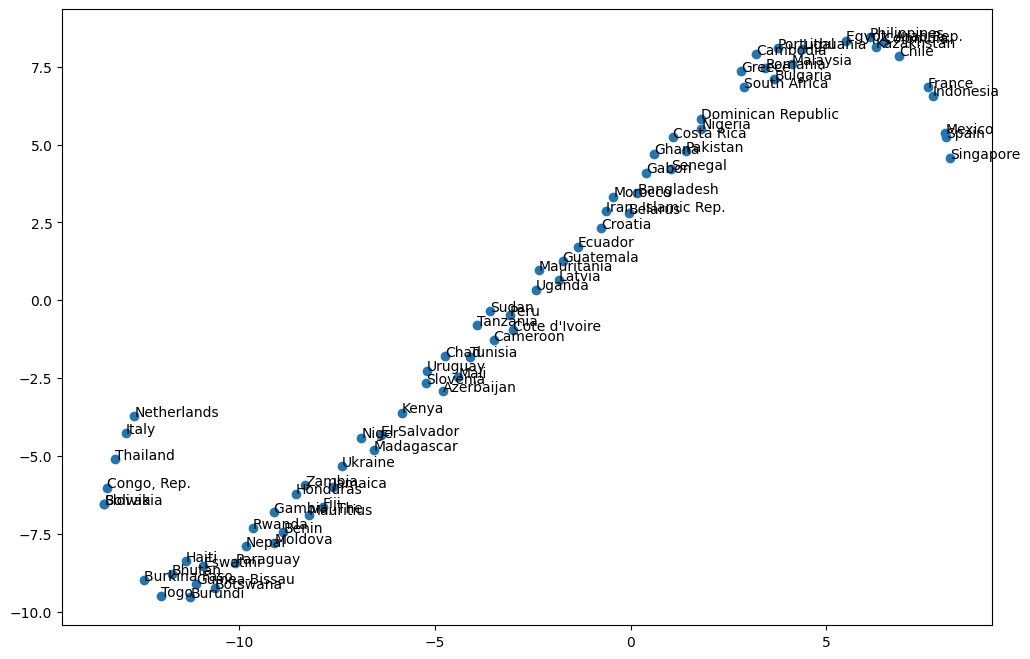

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_economic_tsne[:,0], X_2020_economic_tsne[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_2020_economic_tsne[i,0], X_2020_economic_tsne[i,1]))

plt.show()

**Wnioski:**
Z wykres można podzielić na 3-4 grupy.
Pierwsza grupa zawierająca kraje takie jak Holandia, Włochy, Tajlandia, Republika Konga, czy Boliwia
Druga przypominająca długą linię z większością państw (ciężko dopatrzyć się tam konkretnego trendu)
Trzecia z krajami takimi jak Grecja, Portugalia, Filipiny, Chile, Bułgaria czy Egipt.
Czwarta Fancja, Hiszpania, Meksyk, Singapur i Indonezja, choć te można by podzielić jeszcze na mniejsze.

Co ciekawe w grupie trzeciej znajduje się wiele państw powszechnie uznawanych za kraje turystyczne.



TSNE z perplexity = 2

In [91]:
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
X_2020_economic_tsne = tsne.fit_transform(df_2020.loc[:,economic_indicators].values)
X_2020_economic_tsne

array([[-1.7805166e+00,  4.3913815e+01],
       [ 5.7227497e+01, -6.1619592e+00],
       [ 3.4604652e+01, -3.8963516e+01],
       [ 5.7885807e+01,  3.9116159e-02],
       [ 1.0419860e+01, -1.2089160e+01],
       [ 5.1919980e+00, -4.6778309e+01],
       [ 8.8967972e+00, -9.9928579e+00],
       [-4.2815544e+01,  2.5065802e+01],
       [ 5.7297482e+01, -5.3912377e+00],
       [ 5.6550095e+01, -1.1651031e+01],
       [-1.5619362e+01, -1.8660376e+01],
       [-5.7212112e+01, -1.8245331e+01],
       [-6.0142960e+01, -1.4602467e+01],
       [-4.4626480e+01,  2.4524927e+01],
       [-1.5378437e+01, -2.0357046e+01],
       [ 2.9792208e+01,  8.6281099e+00],
       [ 3.2204208e+01,  1.2507872e+01],
       [ 3.9155772e+00,  3.4605227e+00],
       [-1.4722772e+01, -2.4040928e+01],
       [-1.8498062e+01,  7.1656318e+00],
       [-3.1547686e+01, -8.6284456e+00],
       [-1.7228544e+01,  1.4437901e+00],
       [ 2.6360088e+01,  2.6175895e+00],
       [ 2.7399702e+01,  4.3856878e+00],
       [ 3.40131

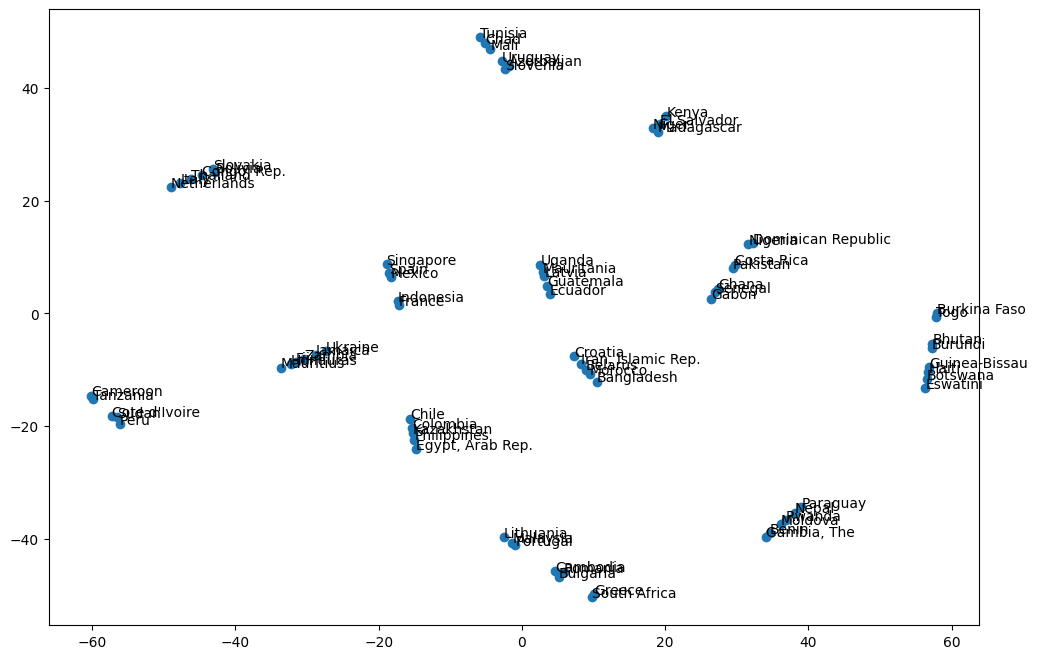

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_economic_tsne[:,0], X_2020_economic_tsne[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_2020_economic_tsne[i,0], X_2020_economic_tsne[i,1]))

plt.show()

**WNIOSKI:**
W tym przypadku wykres został podzielony na wiele mniejszych grup podobnych do siebie państw.
Z ciekawych wniosków Słowacja, czy Republika Kongo jest podobna do Włoch czy Holandi. Szczególnie ciekawa jest w tej grupie obecność Kongo, którego struktura gospodarki jest całkiem inna od pozostałych państw.


**Wskaźniki zdrowotne**

In [93]:
wb.series.info(health_indicators)

id,value
SH.IMM.IDPT,"Immunization, DPT (% of children ages 12-23 months)"
SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)"
SH.HIV.1524.MA.ZS,"Prevalence of HIV, male (% ages 15-24)"
,4 elements


In [31]:

df_2020.loc[:,health_indicators]

series,SP.DYN.LE00.IN,SH.IMM.IDPT,SH.DYN.NMRT,SH.HIV.1524.MA.ZS
economy,,,,
AZE,-0.003414,-0.003414,-0.003414,-0.003414
BDI,-0.003414,-0.003414,-0.003414,-0.003414
BEN,-0.003414,-0.003414,-0.003414,-0.003414
BFA,-0.003414,-0.003414,-0.003414,-0.003414
BGD,-0.003414,-0.003414,-0.003414,-0.003414
...,...,...,...,...
UGA,-0.003414,-0.003414,-0.003414,-0.003414
UKR,-0.003414,-0.003414,-0.003414,-0.003414
URY,-0.003414,-0.003414,-0.003414,-0.003414


TSNE z perplexity = 15

In [32]:
tsne = TSNE(n_components=2, perplexity=15, random_state=0)
X_2020_health_tsne = tsne.fit_transform(df_2020.loc[:,health_indicators].values)
X_2020_health_tsne

array([[ -0.99246526,  -3.6616046 ],
       [  5.0981326 ,   1.8865976 ],
       [  5.839909  ,  -6.1791563 ],
       [  6.330416  ,   1.3915601 ],
       [  0.33642313,   5.6178474 ],
       [ -6.8570614 ,   2.185597  ],
       [ -7.081024  ,   5.704857  ],
       [  1.700408  ,  -7.130159  ],
       [ -0.25298214,   4.926129  ],
       [  3.49436   ,   3.2804174 ],
       [ -9.675344  ,   4.1376753 ],
       [  6.5051146 ,  -5.373623  ],
       [  5.052039  ,  -6.8740344 ],
       [  3.028894  ,  -6.5181136 ],
       [ -5.3689365 ,   1.3165817 ],
       [ -9.162245  ,   6.885098  ],
       [  2.7570357 ,  -1.3108453 ],
       [ -1.2549791 ,  -6.9859724 ],
       [ -1.6018637 ,   4.588542  ],
       [-11.552674  ,   5.3002152 ],
       [ -0.35338604,   6.309972  ],
       [-11.031972  ,   6.160069  ],
       [  3.2343147 ,  -8.054985  ],
       [  5.146868  ,   2.5820553 ],
       [  6.043636  ,  -0.6518671 ],
       [  7.141583  ,  -5.8287053 ],
       [-10.361842  ,   7.3116093 ],
 

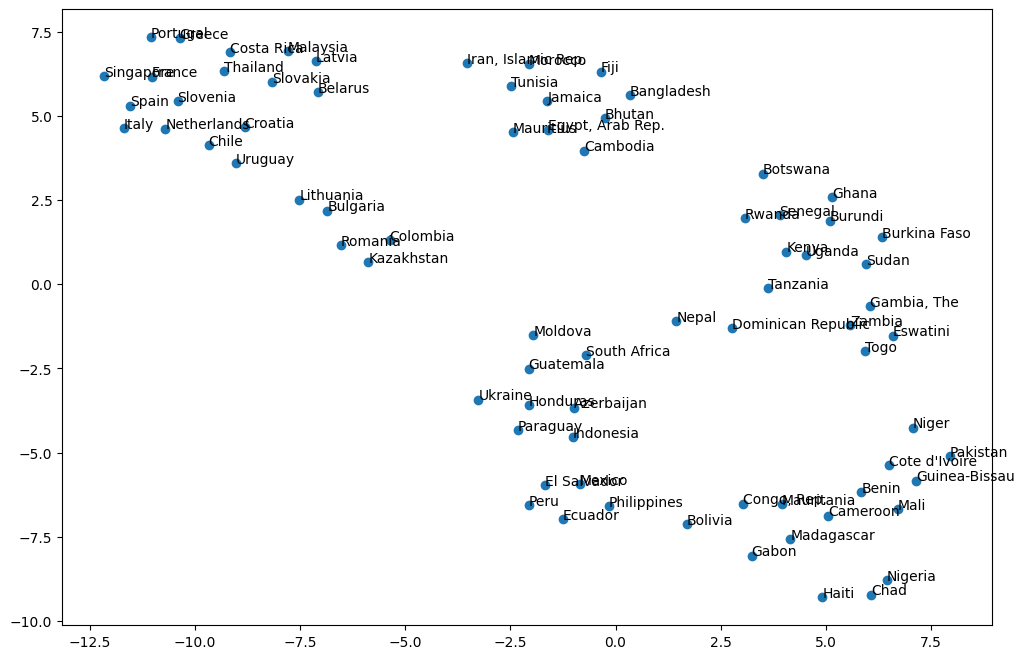

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_health_tsne[:,0], X_2020_health_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_2020_health_tsne[i,0], X_2020_health_tsne[i,1]))

plt.show()

**Wnioski:**
W tym przypadku wykres można podzielić na 3 główne części.



TSNE z perplexity = 7

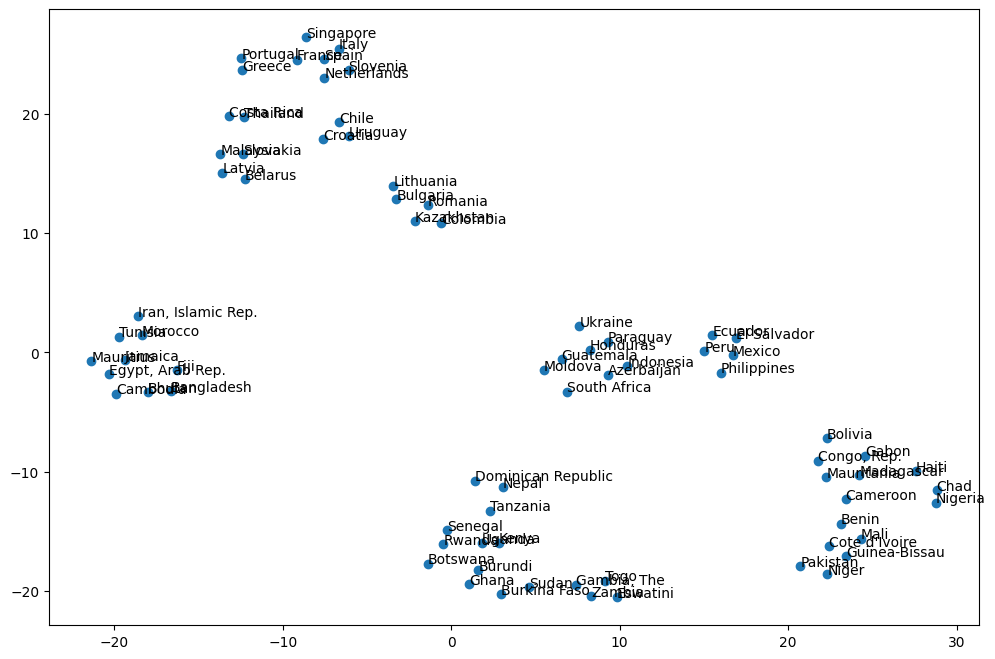

In [94]:
tsne = TSNE(n_components=2, perplexity=7, random_state=0)
X_2020_health_tsne = tsne.fit_transform(df_2020.loc[:,health_indicators].values)


fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_health_tsne[:, 0], X_2020_health_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_2020_health_tsne[i, 0], X_2020_health_tsne[i, 1]))

plt.show()

-Ukraina, Mołdawia czy Azerbejdżan są w innej grupie państw pod względem zdrowotnym niż np. Białoruś, Litwa czy Łotwa. Są to kraje powstałe po rozpadzie ZSRR


**Wskaźniki socjologiczne**

In [100]:
wb.series.info(sociodemographic_indicators)

id,value
SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"
SP.DYN.TFRT.IN,"Fertility rate, total (births per woman)"
SM.POP.NETM,Net migration
SP.POP.0014.TO.ZS,Population ages 0-14 (% of total population)
SP.POP.65UP.TO.ZS,Population ages 65 and above (% of total population)
SP.POP.GROW,Population growth (annual %)
SP.POP.TOTL.FE.ZS,"Population, female (% of total population)"
SP.POP.TOTL,"Population, total"
SM.POP.REFG.OR,Refugee population by country or territory of origin
SP.URB.TOTL.IN.ZS,Urban population (% of total population)


In [36]:
df_2020.loc[:,sociodemographic_indicators]

series,SP.DYN.CDRT.IN,SP.DYN.TFRT.IN,SM.POP.NETM,SP.POP.0014.TO.ZS,SP.POP.65UP.TO.ZS,SP.POP.TOTL.FE.ZS,SM.POP.REFG.OR,SP.POP.GROW,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
economy,,,,,,,,,,
AZE,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003397,-0.003414,-0.001729,-0.003414
BDI,-0.003414,-0.003414,-0.003415,-0.003414,-0.003414,-0.003414,-0.003352,-0.003414,-0.001374,-0.003414
BEN,-0.003414,-0.003414,-0.003413,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.001304,-0.003414
BFA,-0.003414,-0.003414,-0.003415,-0.003414,-0.003414,-0.003414,-0.003411,-0.003414,0.000178,-0.003414
BGD,-0.003414,-0.003414,-0.003424,-0.003414,-0.003414,-0.003414,-0.003411,-0.003414,0.024529,-0.003414
...,...,...,...,...,...,...,...,...,...,...
UGA,-0.003414,-0.003414,-0.003407,-0.003414,-0.003414,-0.003414,-0.003413,-0.003414,0.003997,-0.003414
UKR,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003408,-0.003414,0.003952,-0.003414
URY,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.002841,-0.003414


TSNE z perplexity = 15

In [37]:
tsne = TSNE(n_components=2, perplexity=15, random_state=0)
X_2020_sociodemographic_tsne = tsne.fit_transform(df_2020.loc[:,sociodemographic_indicators].values)
X_2020_sociodemographic_tsne

array([[  3.2429547,  -2.5168548],
       [  2.5106177,  -1.2430183],
       [  2.100194 ,  -1.2240573],
       [ -2.5010743,   2.8977723],
       [-10.230112 ,   9.464562 ],
       [  5.5303445,  -4.806908 ],
       [  3.675937 ,  -2.7986221],
       [  2.2542415,  -1.8004644],
       [  9.783748 ,  -9.142189 ],
       [  8.854316 ,  -7.834218 ],
       [ -1.7056686,   2.4688914],
       [ -3.8543725,   4.158123 ],
       [ -3.7831843,   4.095105 ],
       [  6.0906677,  -5.6829867],
       [ -6.806206 ,   7.107    ],
       [  6.610656 ,  -5.9813595],
       [  2.58631  ,  -2.2411177],
       [ -1.0983945,   1.9669434],
       [ -9.217132 ,   8.856702 ],
       [ -6.6952767,   6.6675863],
       [  9.404359 ,  -9.3542385],
       [ -7.9510803,   7.8748794],
       [  8.507889 ,  -8.608857 ],
       [ -4.719765 ,   4.96055  ],
       [  8.234036 ,  -8.366458 ],
       [  8.720557 ,  -8.809679 ],
       [  3.1232507,  -1.9539213],
       [ -0.8181155,   1.7394612],
       [  3.0845342,

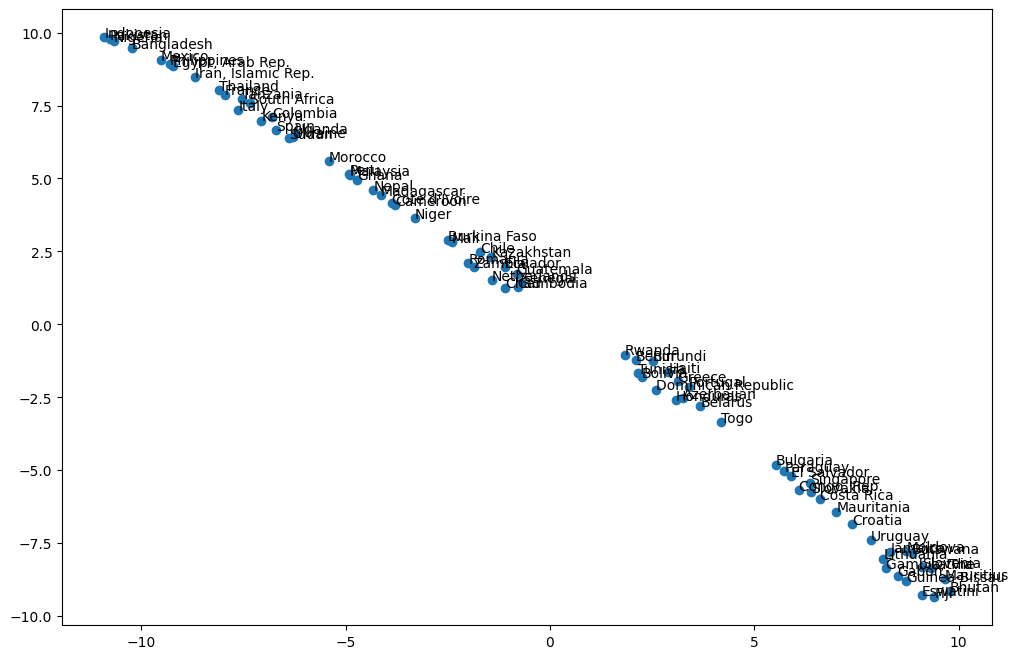

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_sociodemographic_tsne[:,0], X_2020_sociodemographic_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_2020_sociodemographic_tsne[i,0], X_2020_sociodemographic_tsne[i,1]))

plt.show()

TSNE z perplexity = 2

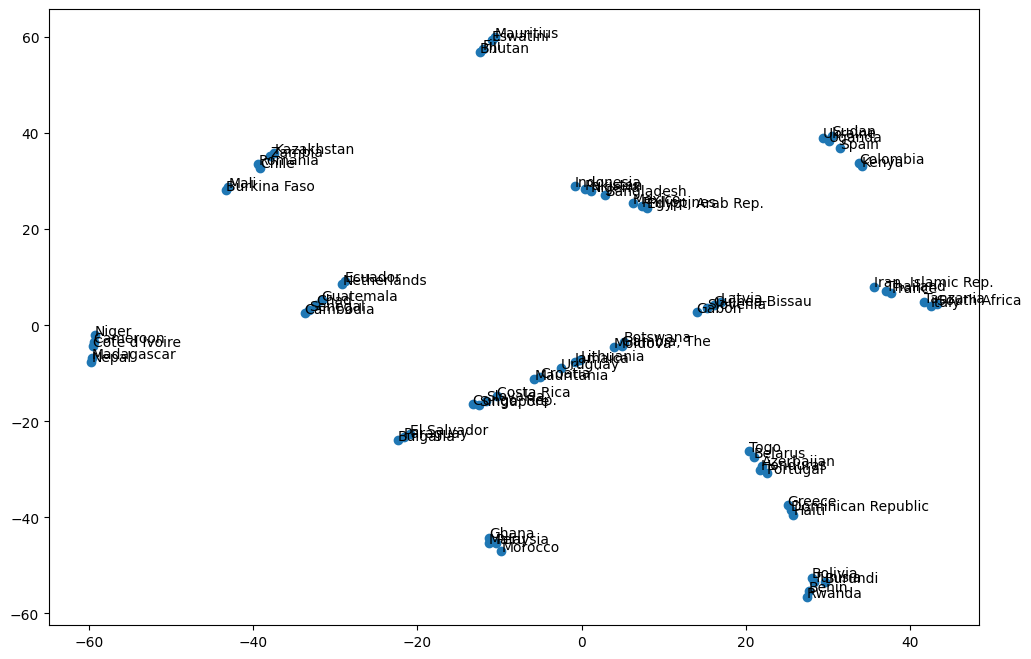

In [99]:
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
X_2020_sociodemographic_tsne = tsne.fit_transform(df_2020.loc[:,sociodemographic_indicators].values)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_sociodemographic_tsne[:, 0], X_2020_sociodemographic_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_2020_sociodemographic_tsne[i, 0], X_2020_sociodemographic_tsne[i, 1]))

plt.show()

**Wnioski:**


## Reszta kodu, robocza

**KOLOROWANIE ZGODNIE Z KONTYNENTEM (COŚ NIE DZIAŁA POPRAWNIE MOŻE KTOŚ OGARNIE GDZIE BŁĄD)**

In [ ]:
len(countries)

77

In [ ]:
len(Africa + Asia + Europe + South_America + Central_America + North_America + Australia_Oceania)

73

In [ ]:
len(countries_continents)

63

In [54]:
#### TO WYGENEROWANE PRZEZ CHATBOT NA PODSTAWIE LISTY countries_full_names (chciałem na podstawie naszych list ale się tam nie zgadza coś liczebność)

countries_continents = ['Azja', 'Afryka', 'Afryka', 'Afryka', 'Azja', 'Europa', 'Europa', 'Ameryka Południowa', 'Azja', 'Afryka', 'Ameryka Południowa', 'Afryka', 'Afryka', 'Afryka', 'Ameryka Południowa', 'Ameryka Środkowa', 'Ameryka Środkowa', 'Ameryka Południowa', 'Afryka', 'Oceania', 'Europa', 'Afryka', 'Afryka', 'Afryka', 'Afryka', 'Europa', 'Ameryka Środkowa', 'Ameryka Południowa', 'Europa', 'Ameryka Środkowa', 'Europa', 'Ameryka Południowa', 'Azja', 'Azja', 'Europa', 'Ameryka Północna', 'Azja', 'Europa', 'Europa', 'Afryka', 'Europa', 'Afryka', 'Ameryka Południowa', 'Afryka', 'Afryka', 'Azja', 'Europa', 'Ameryka Środkowa', 'Europa', 'Europa', 'Afryka', 'Europa', 'Afryka', 'Afryka', 'Azja', 'Europa', 'Ameryka Północna', 'Ameryka Południowa', 'Azja', 'Europa', 'Europa', 'Ameryka Południowa', 'Europa', 'Afryka', 'Afryka', 'Azja', 'Ameryka Południowa', 'Europa', 'Afryka', 'Afryka', 'Azja', 'Europa', 'Afryka', 'Azja', 'Afryka', 'Afryka']

In [55]:
color_dict = {
    "Europa": "blue",
    "Azja": "red",
    "Afryka": "yellow",
    "Ameryka Północna": "green",
    "Ameryka Południowa": "purple",
    "Ameryka Środkowa": "black",
    "Oceania": "brown"
}

In [56]:
colors = [color_dict[continent] for continent in countries_continents]

In [57]:
len(colors)

76

In [58]:
len(countries_full_names)

76

In [59]:
############## te kolory są niepoprawnie narazie (kraje się nie zgadzają z kolorem kontynentu)

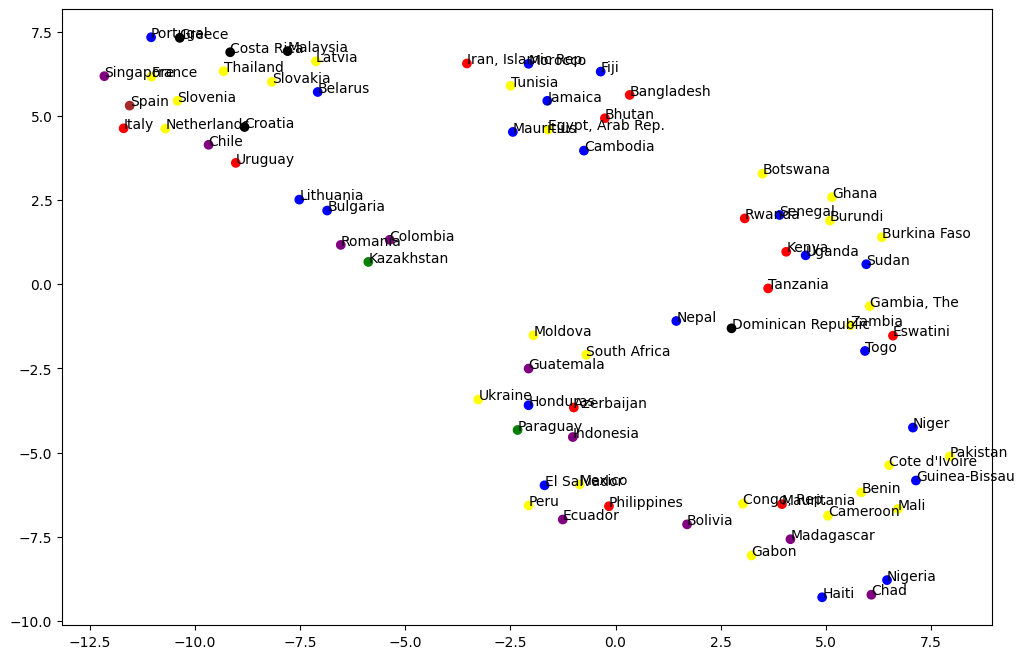

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_2020_health_tsne[:,0], X_2020_health_tsne[:,1], c=colors)

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_2020_health_tsne[i,0], X_2020_health_tsne[i,1]))

plt.show()

In [ ]:
#####

In [ ]:
df_melted = data_frame(all_indicators, all_countries)

In [ ]:
df_filled = df_melted.interpolate()

In [ ]:
data = df_filled.iloc[:, 4:33]

In [ ]:
data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# przeskalowanie danych za pomocą MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data

Próba z PCA (tsne się długo liczy)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(scaled_data)

In [ ]:
X_pca

In [ ]:
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_pca[:,0], X_pca[:,1])

for i, txt in enumerate(df_filled['economy']):
  ax.annotate(txt, (X_pca[i,0], X_pca[i,1]))

plt.show()

WLD - World trzeba usunąć

In [ ]:
all_countries = ['AFE', 'AFW', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LIC', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MRT', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'ZAF', 'ZMB']
len(all_countries)

In [ ]:
df_melted = data_frame(all_indicators, all_countries)

In [ ]:
df_filled = df_melted.interpolate()

In [ ]:
data = df_filled.iloc[:, 4:33]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=20).fit_transform(scaled_data)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_embedded[:,0], X_embedded[:,1])

for i, txt in enumerate(df_filled['economy']):
  ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))

plt.show()

to chyba jest źle bo w tym momencie jeden kraj moze być w wielu miejscach (tak to wygląda)
chyba trzeba te dane inaczej ułożyć